## Importing Libraries 

In [105]:
import cv2  #computervision
import os  #operating System

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt #plot
import seaborn as sns #plot
from mpl_toolkits.mplot3d import Axes3D #3dplot

import skfuzzy as fuzz #fuzzzy cmeans clustering
from sklearn.cluster import KMeans #kmeans clusetring

from time import time

## Load Image Function

In [106]:
def loadImage():
  folder='IMAGEFOLDER/'
  imagelist=os.listdir(folder)  
  imglist=[]
  pathlist=[]
  shapes=[]
  for i in imagelist:
    path=folder+i
    print(path)
    img=cv2.imread(path)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    shapes.append((img.shape[0],img.shape[1],img.shape[2]))
    img=img.reshape((img.shape[0]*img.shape[1],img.shape[2]))
    pathlist.append(i)
    imglist.append(img)
  return zip(imglist,pathlist,shapes)
    

## Changing Color Fucntion for Fuzzy Cmean

In [107]:
def newColor(cluster_membership, clusters):
    img = []
    for pixel  in cluster_membership.T:
        img.append(clusters[np.argmax(pixel)])
    return img

## Loading Image

In [108]:
imglist=[]
shapes=[]
pathlist=[]
for img,path,shape in loadImage():
    pathlist.append(path)
    imglist.append(img)
    shapes.append(shape)
    

IMAGEFOLDER/cow.jpg
IMAGEFOLDER/FLOWER.jpg
IMAGEFOLDER/Stone.jpg
IMAGEFOLDER/YellowMan.jpg


In [109]:
n_data=len(imglist)
shapes

[(768, 1024, 3), (1200, 1600, 3), (500, 750, 3), (501, 750, 3)]

## Displaying  Original Image

Text(0.5,0.98,'ORIGINAL IMAGE')

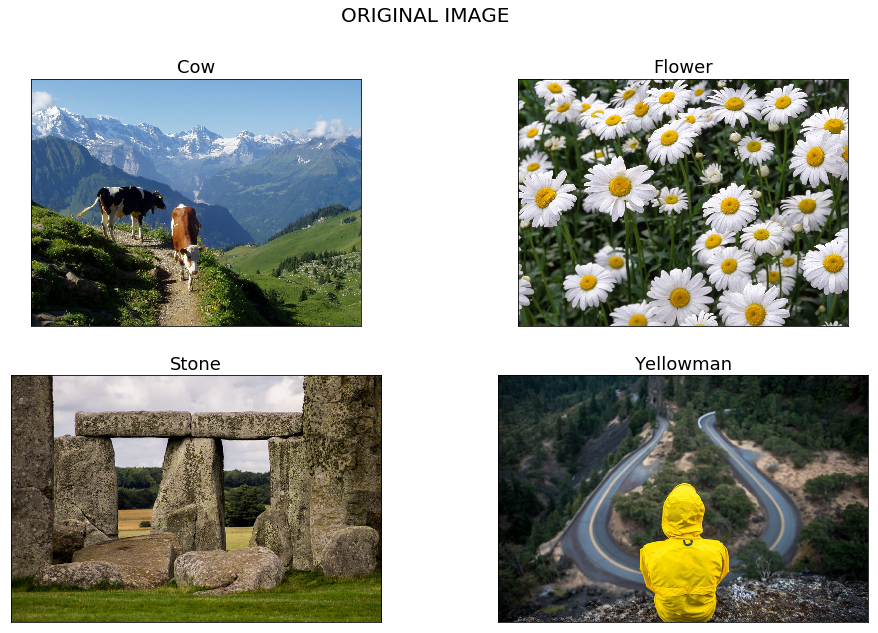

In [110]:
fig , ax = plt.subplots(n_data//2,2 , figsize = (16, 10),subplot_kw=dict(xticks=[], yticks=[]))
j=0
for i in range(n_data//2):
    ax[i][0].imshow(imglist[j].reshape((shapes[j][0],shapes[j][1],shapes[j][2])),)
    ax[i][0].set_title(pathlist[j][:pathlist[j].index(".")].capitalize(),size=18)
    j+=1
    ax[i][1].imshow(imglist[j].reshape((shapes[j][0],shapes[j][1],shapes[j][2])))
    ax[i][1].set_title(pathlist[j][:pathlist[j].index(".")].capitalize(),size=18)
    j+=1
fig.suptitle('ORIGINAL IMAGE' , size = 20)

## FUZZY CMEANS CLUSTERING

Image 1
Image 2
Image 3
Image 4


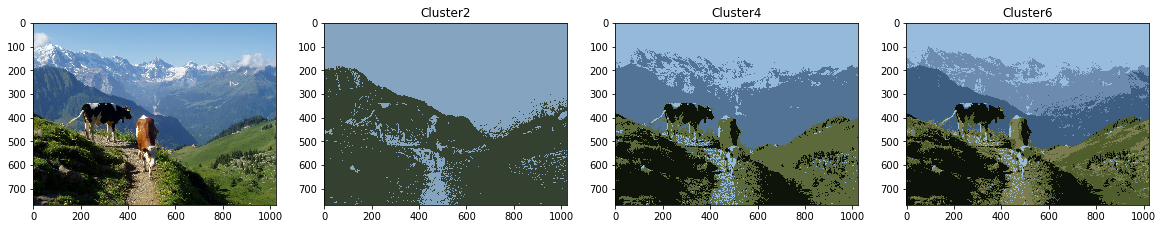

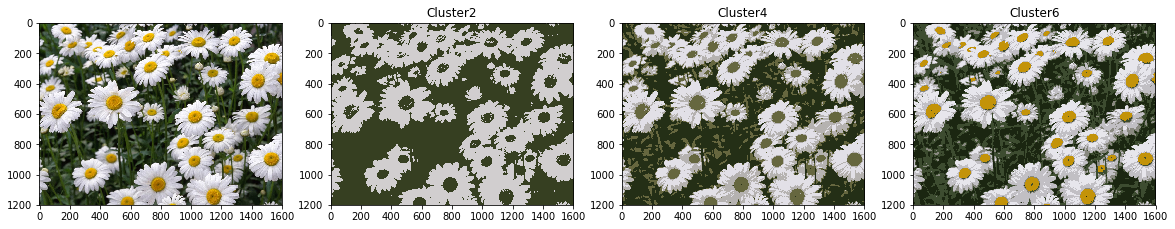

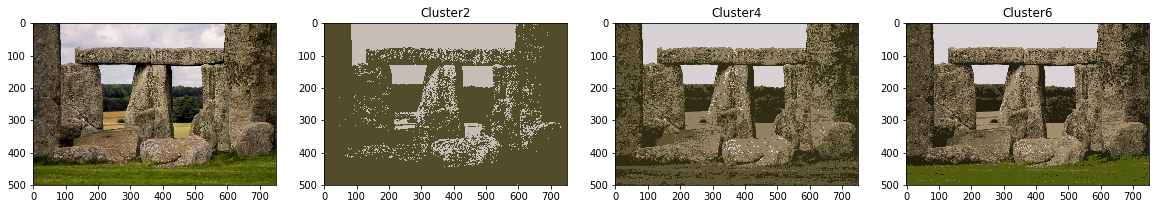

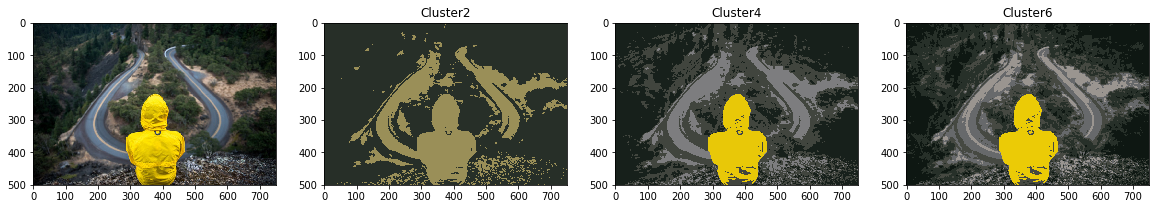

In [111]:
clusters=[2,4,6]
fuzzystarttime=time()
for index,img in enumerate(imglist):
    plt.figure(figsize=(20,20))
    plt.subplot(1,4,1)
    plt.imshow(img.reshape(shapes[index][0],shapes[index][1],shapes[index][2]))
    print('Image '+str(index+1))
    for i,cluster in enumerate(clusters):
        cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(img.T, cluster, 2, error=0.005, maxiter=100, init=None,seed=42)
        new_img = newColor(u,cntr)
        fuzzy_img = np.reshape(new_img,(shapes[index][0],shapes[index][1],shapes[index][2])).astype(np.uint8)
        plt.subplot(1,4,i+2)
        plt.imshow(fuzzy_img)
        name = 'Cluster'+str(cluster)
        plt.title(name)
fuzzyendtime=time()   

# K-MEANS CLUSTERING

Image 1
Image 2
Image 3
Image 4


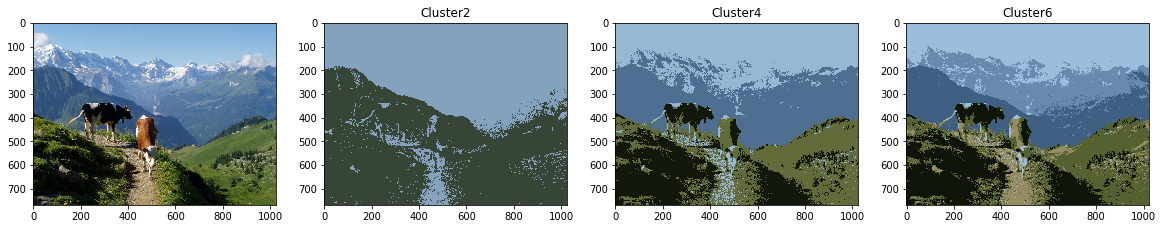

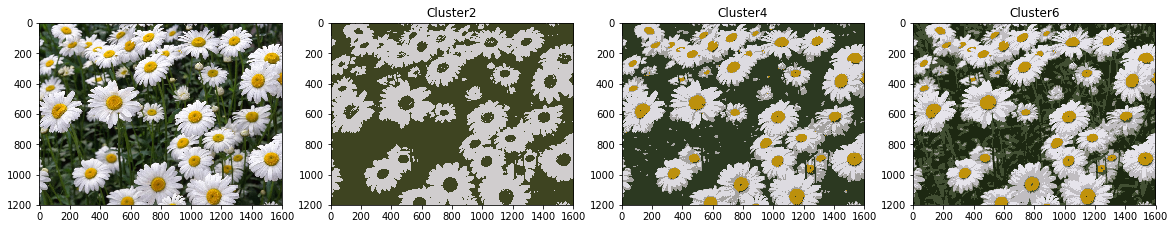

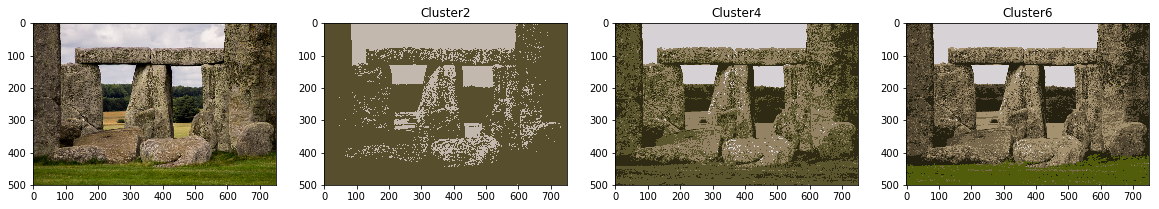

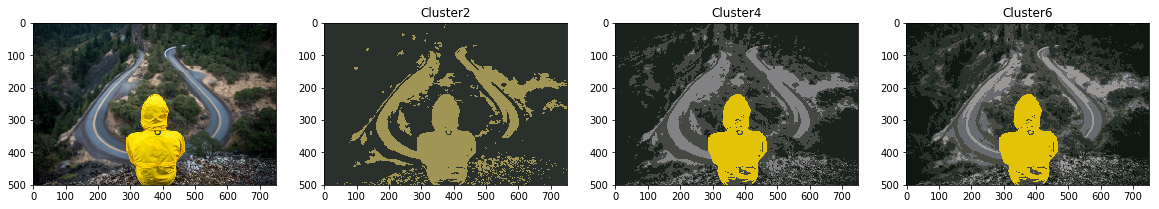

In [113]:
clusters=[2,4,6]
Kmeanstarttime=time()
newimg=[]
for index,img in enumerate(imglist):
    plt.figure(figsize=(20,30))
    plt.subplot(1,4,1)
    plt.imshow(img.reshape(shapes[index][0],shapes[index][1],shapes[index][2]))
    print('Image '+str(index+1))
    
    for i,cluster in enumerate(clusters):
        kmeans=KMeans(n_clusters=cluster)
        kmeans.fit(img)
        new_img =kmeans.cluster_centers_[kmeans.labels_]
        kmean_img = np.reshape(new_img,(shapes[index][0],shapes[index][1],shapes[index][2])).astype(np.uint8)
        newimg=kmean_img
        plt.subplot(1,4,i+2)
        plt.imshow(kmean_img)
        name = 'Cluster'+str(cluster)
        plt.title(name)
kmeanendtime=time()

### Before Clustering the RGB colors are distributed as :

In [114]:
r, g, b = cv2.split(imglist[3].reshape(shapes[3][0],shapes[3][1],shapes[3][2]))
r = r.flatten()
g = g.flatten()
b = b.flatten()
rk, gk, bk = cv2.split(newimg)
rk= rk.flatten()
gk = gk.flatten()
bk = bk.flatten()

Text(0.5,0.92,'3-D representation pixel ')

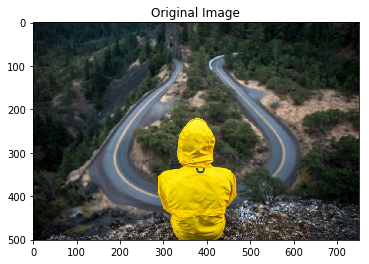

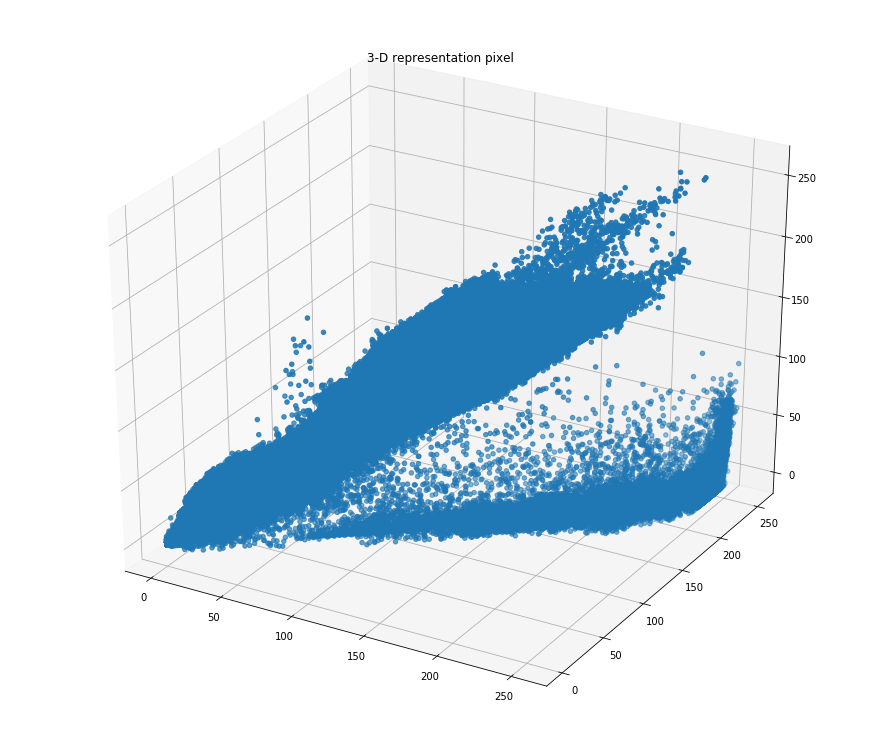

In [115]:
fig2=plt.figure(1)
plt.imshow(imglist[3].reshape(shapes[3][0],shapes[3][1],shapes[3][2]))
plt.title('Original Image')
fig=plt.figure(2,figsize=(12,10))
ax= Axes3D(fig)
ax.scatter(r,g,b)
ax.set_title('3-D representation pixel ')

### After Clustering the RGB colors are distributed as :

Text(0.5,0.92,'3-D representation')

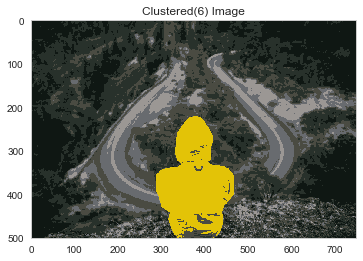

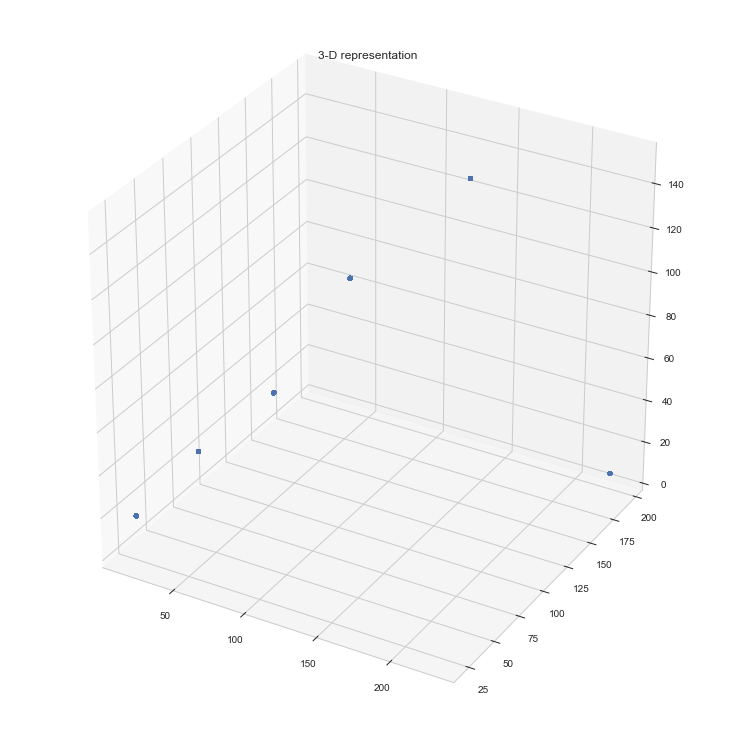

In [122]:
fig2=plt.figure(1)
plt.imshow(newimg)
plt.grid(False)
plt.title('Clustered(6) Image')
fig=plt.figure(2,figsize=(10,10))
ax= Axes3D(fig)
ax.scatter(rk,gk,bk)
ax.set_title('3-D representation')

## Time Comparison

In [123]:

f=fuzzyendtime-fuzzystarttime
k=kmeanendtime-Kmeanstarttime
X=pd.DataFrame({'Type':['FUZZY CMEAN','KMEAN'],'Time':[f,k]})
X

,Type,Time
0,FUZZY CMEAN,909.621681
1,KMEAN,417.437760


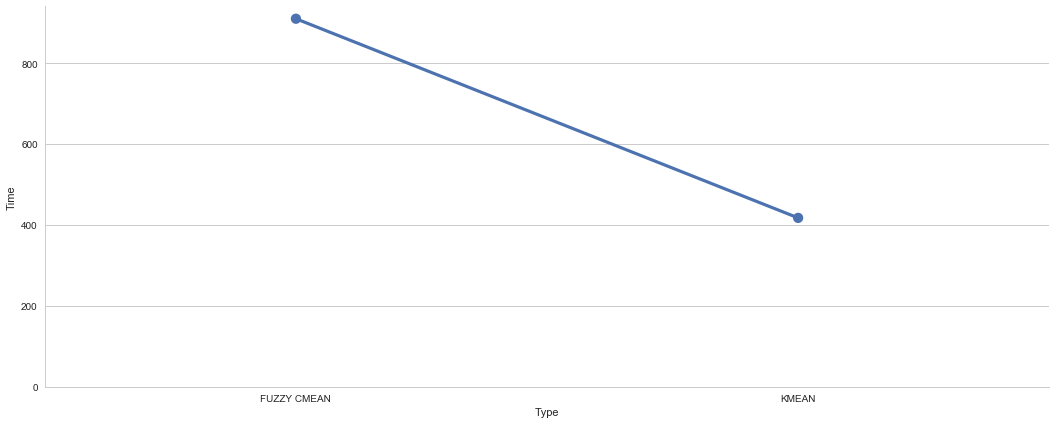

In [124]:
plt.figure(figsize=(18,7))
sns.set(style="whitegrid")
g=sns.pointplot(x=X.Type,y=X["Time"])
g.set(ylim=(0, None))
sns.despine()